The distributions used in this chapter are retrieved from a python library: `numpy.random`. Therefore, the library is first imported (under the alias `random`).

In [49]:
import numpy as np
import numpy.random as random
import matplotlib.pyplot as plt

# 6 Modeling stochastic behavior

Many processes in the world vary a little bit each time they are performed. Setup of machines goes a bit faster or slower, patients taking their medicine takes longer this morning, more products are delivered today, or the quality of the manufactured product degrades due to a tired operator. Modeling such variations is often done with stochastic distributions. A distribution has a mean value and a known shape of variation. By matching the means and the variation shape with data from the system being modeled, an accurate model of the system can be obtained. We use the `numpy.random` library, which has many stochastic distributions available. This chapter explains how to use them to model a system, and lists a few commonly used distributions. 

The following fragment illustrates the use of the random distribution to model a dice. Each value of the six-sided dice is equally likely to appear. Every value having the same probability of appearing is a property of the integer
uniform distribution, in this case using interval $[1, 7)$ (inclusive on the left side, exclusive on the right side).

In the fragment, the distribution `dice` is defined using a lambda function of the `numpy.random` random integer function `randint`. We simulate two dice throws by taking two samples of this distribution by calling `dice()`.


In [80]:
dice = lambda: random.randint(1,7)  # Defining the distribution through a lambda function

# Taking two random samples
dice_throw1 = dice()
dice_throw2 = dice()

print(f"The dice land on {dice_throw1} and {dice_throw2}.") # Printing the results

The dice land on 4 and 4.


## 6.1 Lambda functions

Lambda functions are like a simplified version of normal python functions. While other functions are defined using the `def` keyword, the lambda function is defined using the `lambda` keyword. There are many reasons for using lambda functions. However, in this course, we will use lambda functions for one purpose only: to define stochastic distributions. If you want to find out about other uses of lambda function [click here](https://realpython.com/python-lambda/).

Below we find the most simple example of defining a stochastic distribution with the lambda function. A constant distribution `u` is defined, which when sampled returns `3`. We can take a sample by calling `u()`. More will be explained on constant distributions and other distributions in the next section.

In [81]:
u = lambda: 3  # Defining the constant distribution
y = u()        # Taking a sample
print(f"The value {y} was sampled.")

The value 3 was sampled.


Lambda functions are defined as `lambda <input parameters> : <output function>`. As you can see, they can also accept input parameters.

Below is an example in which we define a function for throwing an n-sided dice, which takes `n` as input, and returns a random integer between `1` and `n+1` (more on the `randint` later).

In [82]:
dice = lambda n: random.randint(1,n+1)  # We define a function for throwing an x-sided dice.
y = dice(20)                            # We sample throwing a 20-sided dice
print(f"The value {y} was sampled.")

The value 18 was sampled.


## 6.2 Distributions

In our models we use both constant, discrete and continuous distributions. A discrete distribution is a distribution where only  specific values can be drawn, for example throwing a dice gives an integer number. A continuous distribution is a distribution where a value from a continuous range can be drawn, for example assembling a product takes a positive amount of time. The constant distributions are discrete distributions that always return the same value. They are useful during the development of the model. A list of distributions and information on how to use them can be found [here](https://numpy.org/doc/1.16/reference/routines.random.html).

### 6.2.1 Constant distributions

When developing a model with stochastic behavior, it is hard to verify whether the model behaves correctly, since the stochastic results
make it difficult to predict the outcome of experiments. As a result, errors in the model may not be noticed, they hide in the noise of
the stochastic results.
One solution is to first write a model without stochastic behavior, verify that model, and then extend the model with stochastic sampling.
Extending the model with stochastic behavior is however an invasive change that may introduce new errors. These errors are again hard to
find due to the difficulties to predict the outcome of an experiment.
The constant distributions aim to narrow the gap by reducing the amount of changes that need to be done after verification.

With constant distributions, a stochastic model with sampling of distributions is developed, but the stochastic behavior is eliminated by
temporarily using constant distributions. The model performs stochastic sampling of values, but with predictable outcome,
and thus with predictable experimental results, making verification easier. After verifying the model, the constant distributions are replaced with the
distributions that fit the mean value and variation pattern of the modeled system, giving a model with stochastic behavior.
Changing the used distributions is however much less invasive, making it less likely to introduce new errors at this stage in the development of the model.

An example of a constant distribution was already shown before, but here it is repeated:

In [78]:
u = lambda: 3  # Defining the constant distribution
y = u()        # Taking a sample
print(f"The value {y} was sampled.")

The value 3 was sampled.


### 6.2.2 Discrete distributions

Discrete distributions return values from a finite fixed set of possible values as answer. In the `numpy.random` library, there are few discrete distributions: 

there is one distribution that returns a boolean when sampled, and there are several discrete distributions that return an integer number.

#### Binomial & Bernoulli

The binomial distribution `random.binomial(n, p)` is a discrete distribution which is used to model the outcome of an experiment with `n` trials, each with `p` chance of succes.

The mean and variance of the binomial distribution are:

mean: $np$

variance: $np(1-p)$

Below we show an example of the binomial distribution, in which we model the flipping of a coin `10` times, with `p = 0.5` probability of succes (heads).

In [192]:
p = 0.5  # probability of heads
coin_flipping = lambda n : random.binomial(n, p)  # Defining the binomial distribution for flipping a coin n times

N = 10
heads = coin_flipping(N)
print(f"We flip a coin {N} times, it lands on head {heads} times.")

We flip a coin 10 times, it lands on head 7 times.


---
#### Bernoulli distribution

A special case of the Binomial distribution is the Bernoulli distribution, which is the case in which `n = 1`, and thus has two possible outcomes: 0 and 1. The bernoulli distribution is defined with `random.binomial(1, p)`


| Figure 6.1: Bernoulli distribution|
- 
<img src="figures/6-bernoulli.png" width=35%>
<a id='fig:6-1'></a>


For this distribution, the mean and variance are given by:

mean: $p$

variance: $p(1-p)$

---
Below is an example in which we plot the outcome of taking 10 samples of a coin flip.

The result of the coin flips is: ['heads', 'heads', 'heads', 'tails', 'heads', 'heads', 'tails', 'heads', 'tails', 'tails']


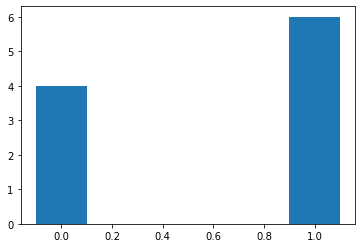

In [217]:
p = 0.5
samples = random.binomial(1, p, 10)  # We take 10 samples of the bernoulli distribution

print(f"The result of the coin flips is:", ["heads" if sample == 1 else "tails" for sample in samples])
fig = plt.figure()
hist = plt.hist(samples, bins = [-0.1,0.1,0.9,1.1])

#### Discrete uniform

Discrete distribution that has several equally likely outcomes for the numbers `{a, a+1, a+2, ..., b-2, b-1}`. Note that `b` is not included.

| Figure 6.2: Discrete uniform distribution|
- 
<img src="figures/6-disc_uni.png" width=35%>
<a id='fig:6-2'></a>

For this distribution, the mean and variance are given by:

mean:  $\frac{a+b-1}{2}$

variance:  $\frac{(b-a)^2-1}{12}$



In [79]:
a = 1 # lower bound
b = 5 # upper bound
random.randint(a,b, size=3)

array([2, 3, 1])

#### Random choice

Discrete distribution that can be given different probabilities for each of the outcomes, the numbers `{0, ..., a-2, a-1}`. Note that `a` is not included.

In [20]:
a = 5 # upper bound
size = 3
random.choice(a, size, p=[0.1, 0.2, 0.4, 0.2, 0.1])

array([3, 3, 2])

For this distribution, the mean and variance are given by:

mean: $??$

variance: $??$

### 6.2.3 Continuous distributions

Continuous distributions return a value from a continuous range.

#### Continuous uniform

Continuous distribution with equal chnace of sampling each value in the range `[a,b)`. Note that `b` is not included.

In [52]:
a = 1 # lower bound
b = 5 # upper bound
size = 3
random.uniform(a,b,size)

array([2.76714199, 1.08674531, 2.78012486])

For this distribution, the mean and variance are given by:

mean: $\frac{a+b}{2}$

variance: $\frac{(b-a)^2}{12}$

#### Gamma

Distribution which has either a decreasing probability function, or a peak.

In [22]:
a = 1 # shape parameter
b = 1 # scale parameter
size = 3
random.gamma(a, b, size)

array([0.41474895, 0.61531395, 1.09260032])

For this distribution, the mean and variance are given by:

mean: $ab$

variance: $ab^2$

## 6.3 Simulating stochastic behavior

In this chapter, the mathematical notion of stochastic distribution is used to describe how to model stochastic behavior.
Simulating a model with stochastic behavior at a computer is however not stochastic at all. Computer systems are deterministic machines, and have no notion of varying results.

A (pseudo-)random number generator is used to create stochastic results instead. It starts with an initial \emph{seed}, an integer number (you can give one at the start of the simulation). From this seed, a function creates a stream of `random` values. When looking at the values there does not seem to be any pattern. It is not truly random however. Using the same seed again gives exactly the same stream of numbers. This is the reason to call the function a `pseudo`-random number generator (a true random number generator would never produce the exact same stream of numbers). A sample of a distribution uses one or more numbers from the stream to compute its value. The value of the initial seed thus decides the value of all samples drawn in the simulation.

While doing a simulation study, performing several experiments with the same initial seed invalidates the results, as it is equivalent to copying the outcome of a single experiment a number of times. On the other hand, when looking for the cause of a bug in the model, performing the exact same experiment is useful as outcomes of previous experiments should match exactly.

#### Normal distribution

This generates a random float sampled from a univariate “normal” (Gaussian) distribution of mean 0 and variance 1.

In [ ]:
random.randn()

#### Uniform distribution

Samples are uniformly distributed over the half-open interval $[a, b)$. Note that this does not include b. In other words, any value within the given interval is equally likely to be drawn by uniform.

The probability density function of the uniform distribution is

$p(x) = \frac{1}{b - a}$

anywhere within the interval $[a, b)$, and zero elsewhere.

In [50]:
a = 1 # lower bound 
b = 2 # upper bound
size = 3
random.uniform(a, b, size)

array([1.72217142, 1.82814654, 1.45450857])

#### Exponential distribution

Its probability density function is

$f(x; \frac{1}{\beta}) = \frac{1}{\beta} \exp(-\frac{x}{\beta})$,

for x > 0 and 0 elsewhere. $\beta$ is the scale parameter, which is the inverse of the rate parameter $\lambda = 1/\beta$. The rate parameter is an alternative, widely used parameterization of the exponential distribution.

In [ ]:
scale = 0.5
size = 3
random.exponential(scale, size)

#### Poisson distribution

The Poisson distribution is the limit of the binomial distribution for large N.

The Poisson distribution

$f(k; \lambda)=\frac{\lambda^k e^{-\lambda}}{k!}$

For events with an expected separation $\lambda$ the Poisson distribution $f(k; \lambda)$ describes the probability of k events occurring within the observed interval $\lambda$.

In [ ]:
a = 1 # expectation of the interval
size = 3
random.poisson(a, size)

## 6.4 Exercises

### Exercise 1

Accoriding to the manual, for a gamma distribution with parameters `(a,b)`, the mean equals $ab$.

(a) Verify if this is true for three different pairs of `a` and `b`.

(b) How many samples from the distribution are approximately required to determine the mean up to three decimals accurate?

In [ ]:
''' This can be used to find the answers to exercise 1 '''
...

### Exercise 2

Estimate the mean $\mu$ and variance $\sigma ^2$ of a triangular distribution triangle($1,2,5$) by simulating 1000 samples. (Recall that the variance $\sigma ^2$ of $n$ samples $x_i$ can be calculated by: $\sigma ^2=\frac{1}{n-1}\sum_{i=1}^{n} (x_{i}-\overline{x})^2$.)

In [ ]:
''' This can be used to find the answers to exercise 2 '''
...

### Exercise 3

We would like to build a small game, called Higher or Lower. The computer picks a random integer number between 1 and 14. The
player then has to predict whether the next number will be higher or lower. The computer picks the next random number and compares the new number with the previous one. If the player guesses right his score is doubled. If the player guesses wrong, he looses all and the game is over. Try the following specification.

In [46]:
def HoL():
    sc = 1
    c = True
    oldval = 0
    
    new = random.uniform(1, 15)
    print("Your score is: ", sc)
    print("The computer drew: ", new)
    
    while c:
        s = input('(h)igher or (l)ower: ')
        oldval = new
        new = random.uniform(1, 15)
        print("The computer drew: ", new)
        if new == oldval:
            c = False
        else:
            c = (new > oldval) == (s == "h")
        if c:
            sc = 2*sc
        else:
            sc = 0
        print("Your score is: ", sc)
    
    print("GAME OVER...")
        
HoL()

Your score is:  1
The computer drew:  5.531283998258651
(h)igher or (l)ower: l
The computer drew:  4.375459850388987
Your score is:  2
(h)igher or (l)ower: l
The computer drew:  14.704549478463216
Your score is:  0
GAME OVER...


(a) What is the begin score?

(b) What is the maximum end score?

(c) What happens, when the drawn sample is equal to the previous drawn sample?

(d) Extend this game specification with the possibility to stop.

In [ ]:
''' This can be used to find the answers to exercise 3 d '''
def HoL():
    sc = 1
    c = True
    oldval = 0
    
    new = random.uniform(1, 15)
    print("Your score is: ", sc)
    print("The computer drew: ", new)
    
    while c:
        s = input('(h)igher or (l)ower: ')
        oldval = new
        new = random.uniform(1, 15)
        print("The computer drew: ", new)
        if new == oldval:
            c = False
        else:
            c = (new > oldval) == (s == "h")
        if c:
            sc = 2*sc
        else:
            sc = 0
        print("Your score is: ", sc)
    
    print("GAME OVER...")
        
HoL()

## 6.5 Answers to exercises

### Exercise 1

(a) the mean produced is close to $ab$

(b) -

In [37]:
def model(a, b, N):
    sum = 0.0
    for i in range(1,N+1):
        u = random.gamma(a,b)
        sum = sum + u
    print("The mean is: ", sum/N)
model(1,2,1000000)

The mean is:  1.999849982837349


### Exercise 2

In [40]:
def model():
    mean  = 0.0
    variance = 0.0
    for i in range (1,1001):
        u = random.triangular(1,2,5)
        mean = (mean * (i-1) + u) / i;
        if i != 1:
            variance = ((i-2) * variance + (u - mean)**2) / (i-1)
        else:
            variance = 0.0
    print("The mean is: ", mean)
    print("The variance is: ", variance)
model()

The mean is:  2.68133042190649
The variance is:  0.7410940002927793


### Exercise 3

(a) Initially, the score is 1 as can be seen from the initial value assigned to the variable `sc`.

(b) There is (in principal) no maximum end score, although the range of integers will be limited and therefore and error may be generated.

(c) In that case the game stops

(d)

In [47]:
def HoL():
    sc = 1
    c = True
    d = True
    oldval = 0
    
    new = random.uniform(1, 15)
    print("Your score is: ", sc)
    print("The computer drew: ", new)
    
    while c and d:
        s = input('(h)igher or (l)ower?')
        oldval = new
        new = random.uniform(1, 15)
        print("The computer drew: ", new)
        if new == oldval:
            c = False
        else:
            c = (new > oldval) == (s == "h")
        if c:
            sc = 2*sc
        else:
            sc = 0
        print("Your score is: ", sc)
        if c:
            s = input('Do you want to (s)top, or (c)ontinue?')
            d = s == "c"
    
    print("GAME OVER...")
        
HoL()

Your score is:  1
The computer drew:  13.41741197591782
(h)igher or (l)ower?l
The computer drew:  8.532723140776056
Your score is:  2
Do you want to (s)top, or (c)ontinue?s
GAME OVER...
